In [18]:
import numpy as np

As = []
Bs=[]
Cs=[]
BBs=[]
Beachs= []
Cars=[]
Wins = []
Campuses = []

for i in range(1000000):
    rand1 = np.random.uniform()
    A = 0
    B= 0 
    C= 0
    if rand1 <=0.6:
        A = 1
    elif rand1 <= 0.9:
        B = 1
    else:
        C = 1
    
    car = False
    rand2= np.random.uniform()
    if np.random.uniform() >=0.5: # bull market
        market = 1
        if A == 1:
            car = (rand2 <= 0.8)
        elif B == 1:
            car = (rand2 <=0.5)
        else:
            car = (rand2 <= 0.2)
    else: # Bear market
        market = 0
        if A == 1:
            car = (rand2 <= 0.5)
        elif B == 1:
            car = (rand2 <= 0.3)
        else:
            car = (rand2 <= 0.1)
    
    rand3 = np.random.uniform()
    beach =0
    campus =0
    if car == True:
        if rand3 <= 0.7:
            beach = 1
        else:
            campus =1
    else:
        if rand3 <= 0.2:
            beach =1
        else:
            campus = 1
    
    win=0
    rand4  = np.random.uniform()
    if np.random.uniform()<= 0.001:
        win = 1
        if rand4<= 0.99:
            beach = 1
        else:
            beach = 0
    if beach ==1:
        Wins.append(win)
      
        
    if beach == 1:
        #Wins.append(win)
        Beachs.append(beach)
        Cars.append(car)
        As.append(A)
        Bs.append(B)
        Cs.append(C)
        BBs.append(market)
        Campuses.append(campus)
        

    
print ("The probability that she got a car is:", sum(Cars)/len(Cars))
print ("The probability that bearish market is:", 1-sum(BBs)/len(BBs))
print ("The probability that she got B is:", sum(Bs)/len(Bs))
print ("The probability that she win the seepstakes:", sum(Wins)/len(Wins))



The probability that she got a car is: 0.7940857731282193
The probability that bearish market is: 0.4322916441792488
The probability that she got B is: 0.26043020409220635
The probability that she win the seepstakes: 0.00218685641010142


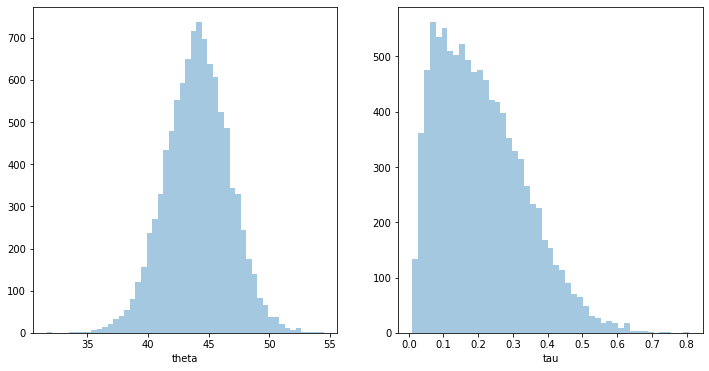

2.5% percentile: 38.90026068146762
97.5% percentile: 49.1427580619638
6.914621594372677
44.08317327476479


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(6)
data = np.array([41,44,43,47,43,46,45,42,45,45,43,45,47,40])


def probability(data):
    total = sum(data)
  
    n = len(data)


    thetas= np.array([])
    taus= np.array([])

    theta_0 = 45 
    tau_0= 1/4
    a = 4
    b = 2
    
    #initial values
    theta= 45
    tau = 1/4
    

    for i in range(11000):
       
        theta_new = np.random.normal((tau*total+tau_0*theta_0)/(tau_0+n*tau),np.sqrt(1/tau_0+n*tau))
        tau_new = np.random.gamma(a + n/2,  1/(b+1/2 * np.sum((data - theta_new)**2)))
        thetas = np.append(thetas, theta_new)
        taus = np.append(taus, tau_new)
        theta_ = theta_new
        tau = tau_new
        
        
    return thetas[1000:], taus[1000:]

thetas, taus = probability(data)

theta_var = np.var(thetas)

theta_mean = np.mean(thetas)

theta_sim = np.random.normal(theta_mean, np.sqrt(theta_var),10000)


plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.distplot(thetas, kde=False, axlabel="theta")
plt.subplot(1, 2, 2)
sns.distplot(taus, kde=False, axlabel="tau")
plt.show()



print ("2.5% percentile:", np.percentile(thetas, 2.5))
print ("97.5% percentile:", np.percentile(thetas, 97.5))
plt.show()


print (theta_var)
print (theta_mean)